# Page Rank Algorithm with Graph Theory

"The file lesmiserables.gml contains the weighted network of coappearances of characters in Victor Hugo's novel "Les Miserables".  Nodes represent characters as indicated by the labels and edges connect any pair of characters that appear in the same chapter of the book.  The values on the edges are the number of such coappearances." 
Source : http://users.csc.calpoly.edu/~dekhtyar/466-Fall2010/labs/lab7/lesmis.txt

### Why did I take this dataset/GML ? 

Getting the page rank of the coappearances of a character in a novel is a great way to understand Google's approach to searching. Here we can say the most popular character with the most number of coappearances is the same as the most popular website with the most no. of hyperlinks. 


In [1]:
import networkx as nx
lm_network = nx.read_gml('data/lesmiserables.gml')

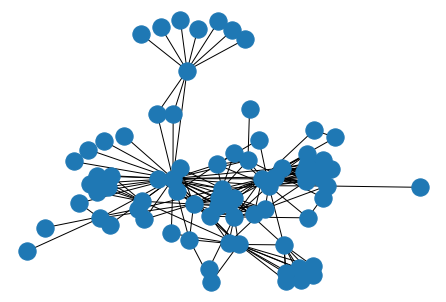

In [2]:
import matplotlib as pl
nx.draw(lm_network,pos=nx.spring_layout(lm_network))

{'Myriel': Text(0.6601478880451671, 0.11524527732733639, 'Myriel'),
 'Napoleon': Text(1.0, 0.13951120952881874, 'Napoleon'),
 'MlleBaptistine': Text(0.37532115234478325, 0.20683899338312087, 'MlleBaptistine'),
 'MmeMagloire': Text(0.36070394757939156, 0.267664721194404, 'MmeMagloire'),
 'CountessDeLo': Text(0.9497705105744225, 0.21446374142217714, 'CountessDeLo'),
 'Geborand': Text(0.9272449610936594, 0.08468332566328027, 'Geborand'),
 'Champtercier': Text(0.9448613563698062, -0.05154919892739089, 'Champtercier'),
 'Cravatte': Text(0.8876448401976688, -0.10478106583907293, 'Cravatte'),
 'Count': Text(0.9070582131870695, 0.2947740164162473, 'Count'),
 'OldMan': Text(0.9915375140973572, 0.01669413535289582, 'OldMan'),
 'Labarre': Text(-0.24061030451593327, 0.5339412319016001, 'Labarre'),
 'Valjean': Text(-0.07144374784417479, 0.16571676111184747, 'Valjean'),
 'Marguerite': Text(-0.3725997645210701, 0.06622380489757566, 'Marguerite'),
 'MmeDeR': Text(-0.3554500949741567, 0.452439262183531

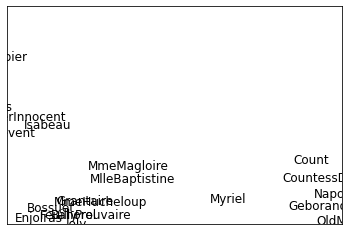

In [3]:
nx.draw_networkx_labels(lm_network,pos=nx.spring_layout(lm_network))

Let's get the adjacency matrix for that graph, in sparse matrix representation. We will use SciPy's `sparse` package for that.  Because a matrix only holds numerical information, we need to maintain a separate list of names corresponding to the graph nodes.

In [4]:
import numpy as np
from scipy import sparse
import scipy.sparse.linalg
characters = np.array(list(lm_network.nodes()))  # array for multi-indexing
Adj = nx.to_scipy_sparse_matrix(lm_network, dtype=np.float64)

In [5]:
characters

array(['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire',
       'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count',
       'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau',
       'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville',
       'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier',
       'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois',
       'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge',
       'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy',
       'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent',
       'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand',
       'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois',
       'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras',
       'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel',
       'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer',
       'Babet', 'C

In [6]:
import pandas as pd
pd.DataFrame(characters[:20]).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Myriel,Napoleon,MlleBaptistine,MmeMagloire,CountessDeLo,Geborand,Champtercier,Cravatte,Count,OldMan,Labarre,Valjean,Marguerite,MmeDeR,Isabeau,Gervais,Tholomyes,Listolier,Fameuil,Blacheville


From the adjacency matrix, we derive a transition probability matrix, where every 1-edge is replaced by a probability of 1 over the number of outgoing edges from that species. 


The total number of characters in our matrix is going to be used a lot, so let's call it $n$:

In [7]:
n = len(characters)
Adj

<77x77 sparse matrix of type '<class 'numpy.float64'>'
	with 508 stored elements in Compressed Sparse Row format>

In [8]:
Adj.todense()

matrix([[0., 1., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

To make it look pretty, pandas to the rescue!

In [9]:
pd.DataFrame(Adj.todense())

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [10]:
np.seterr(divide='ignore')  # ignore division-by-zero errors

degrees = np.ravel(Adj.sum(axis=1))
Deginv = sparse.diags(1 / degrees).tocsr()

Since adjacency matrices are often sparse, and filled with only ones, plotting them cam be quite informative. Let's write a matrix plotting function.

In [11]:
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(10, 5))
    # you may have to replace 'axisbg' below with 'facecolor', depending on the version of your matplotlib
    ax = fig.add_subplot(111, facecolor='black') #axisbg='b')
    ax.plot(m.row, m.col, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

Let's plot the diagonal matrix made of the inverse of the out-degrees of each node, and the character Web matrix, too.

/Users/davidnallapu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

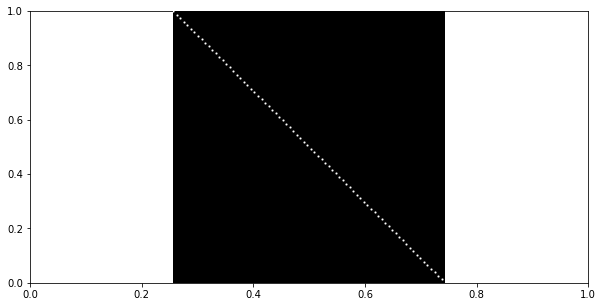

In [12]:
m = sparse.diags(1 / degrees).tocoo()
ax = plot_coo_matrix(m)
ax.figure.show()

/Users/davidnallapu/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 432x288 with 0 Axes>

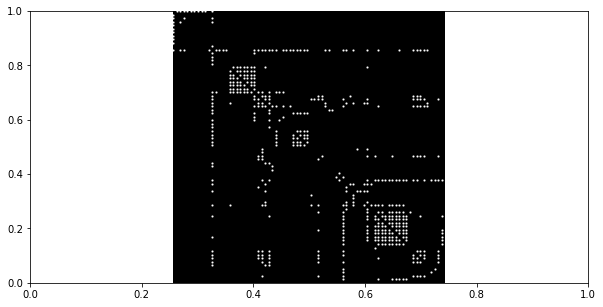

In [13]:
A = Adj.tocoo()
ax = plot_coo_matrix(A)
ax.figure.show()

And for ascii style, with out-degrees on the right margin:

In [14]:
dense = Adj.todense()

for i in range(48):
    for row in dense[i]:
        numbers =[ np.vectorize(np.int)(x) for x in row ]
        degrees = np.sum(numbers)
        print(''.join(str(i) for i in numbers).replace(' ', '').replace('\n', '') + ' ' + str(degrees))

[[01111111110100000000000000000000000000000000000000000000000000000000000000000]] 10
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10010000000100000000000000000000000000000000000000000000000000000000000000000]] 3
[[10100000000100000000000000000000000000000000000000000000000000000000000000000]] 3
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[10000000000000000000000000000000000000000000000000000000000000000000000000000]] 1
[[00000000000100000000000000000000000000000000000000000000000000000000000000000]] 1
[[1011000000101111000000011111110111111110000110001101000100100000100011111

And now compute the transition matrix in the way below, because mutliplying a matrix by a diagonal matrix of factors will mutliply each entry in the matrix by its associated factor:

And now compute the transition matrix in the way below, because mutliplying a matrix by a diagonal matrix of factors will mutliply each entry in the matrix by its associated factor:

In [15]:
Trans = (Deginv @ Adj).T
Trans

<77x77 sparse matrix of type '<class 'numpy.float64'>'
	with 508 stored elements in Compressed Sparse Column format>

Let's verify by examining the first row:

In [16]:
dTrans = Trans.T.todense()
dTrans[0]

matrix([[0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0.1, 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

### Search for the Dominant Eigenvector

In [17]:
from scipy.sparse.linalg import spsolve

damping = 0.85
beta = 1 - damping

I = sparse.eye(n, format='csc')  # Same sparse format as Trans

pagerank = spsolve(I - damping * Trans,
                   np.full(n, beta / n))

And here's the PageRank for each character:

In [18]:
import pandas as pd
in_degrees = np.ravel(Adj.sum(axis=0))
for i, (s, d, p) in enumerate(zip(characters, in_degrees, pagerank)):
    print(i, s, '(' + str(d) + ')', p)

0 Myriel (10.0) 0.042779281022712105
1 Napoleon (1.0) 0.005584290834982478
2 MlleBaptistine (3.0) 0.010277134629737837
3 MmeMagloire (3.0) 0.010277134629737837
4 CountessDeLo (1.0) 0.005584290834982478
5 Geborand (1.0) 0.005584290834982478
6 Champtercier (1.0) 0.005584290834982478
7 Cravatte (1.0) 0.005584290834982478
8 Count (1.0) 0.005584290834982478
9 OldMan (1.0) 0.005584290834982478
10 Labarre (1.0) 0.003729040931048254
11 Valjean (36.0) 0.07543012163278472
12 Marguerite (2.0) 0.005260327543023242
13 MmeDeR (1.0) 0.0037290409310482536
14 Isabeau (1.0) 0.003729040931048254
15 Gervais (1.0) 0.0037290409310482553
16 Tholomyes (9.0) 0.01564742736848246
17 Listolier (7.0) 0.012618202914107778
18 Fameuil (7.0) 0.01261820291410778
19 Blacheville (7.0) 0.01261820291410778
20 Favourite (7.0) 0.01261820291410778
21 Dahlia (7.0) 0.012618202914107778
22 Zephine (7.0) 0.01261820291410778
23 Fantine (15.0) 0.027022704917205684
24 MmeThenardier (11.0) 0.019501134691061097
25 Thenardier (16.0) 0.

How does a characters' popularity rank compare to the number of coappearances? Let's write a function to scatter-plot PageRank versus in-degree for named nodes.

In [19]:
def pagerank_plot(in_degrees, pageranks, names, *,
                  annotations=[], **figkwargs):
    """Plot node pagerank against in-degree, with hand-picked node names."""

    fig, ax = plt.subplots(**figkwargs)
    ax.scatter(in_degrees, pageranks, c=[0.835, 0.369, 0], lw=0)
    for name, indeg, pr in zip(names, in_degrees, pageranks):
        if name in annotations:
            text = ax.text(indeg + 0.1, pr, name)
    ax.set_ylim(0, np.max(pageranks) * 1.1)
    ax.set_xlim(-1, np.max(in_degrees) * 1.1)
    ax.set_ylabel('PageRank')
    ax.set_xlabel('In-degree (number of interactions)')

We pre-label some interesting nodes in the plot:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


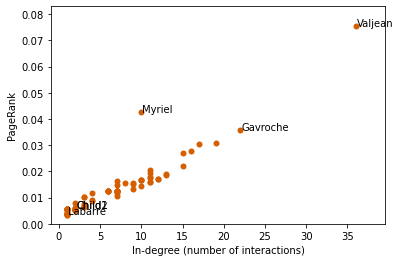

In [20]:
interesting = ['Valjean','Myriel','Gavroche','Labarre','Child1','Child2']
in_degrees = np.ravel(Adj.sum(axis=0))
pagerank_plot(in_degrees, pagerank, characters, annotations=interesting)

## Conclusion : 
### 1. Jean Valjean is the hero of the show. It is his life journey that we follow in Les Miserables. The page rank algorithm clearly shows this as he has the highest no. of coappaearances. This is exactly what one would expect as the hero of the story will coappear the most no. of times. 

### 2. Myriel and Gavroche are ranked high as the former is also an important character and the latter is a child on the streets that appears frequently.

### 3. Jacquin Labarre is the least important as he is just an inn keeper in the story. This is again exactly what we expect. An interesting observation is that although unnamed Child 1 and Child 2 coappear more than Labarre but still insignificantly less to most others. 